<a href="https://colab.research.google.com/github/elnaggar96/ahmed-elnagar/blob/main/Titanic_survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Describing the data**

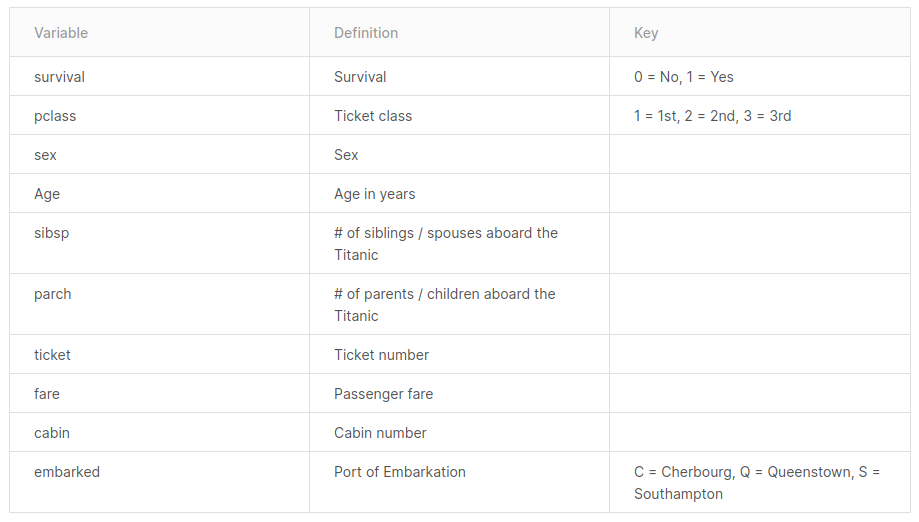

....Image Source:https://www.kaggle.com/c/titanic/data

**Import necessary libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

df = pd.read_csv('/content/drive/MyDrive/the titanic project/ titanic survivors/train.csv')
test = pd.read_csv('/content/drive/MyDrive/the titanic project/ titanic survivors/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# linear algebra
import numpy as np 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**seperate the data into numeric and categorical**

In [6]:
df_num =df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

make plots of the numeric data

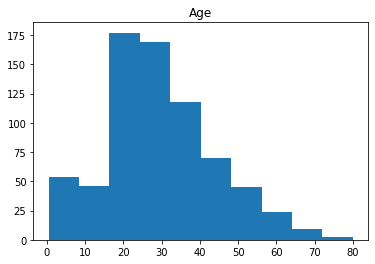

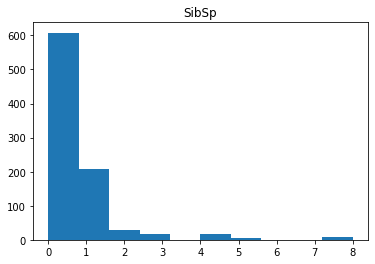

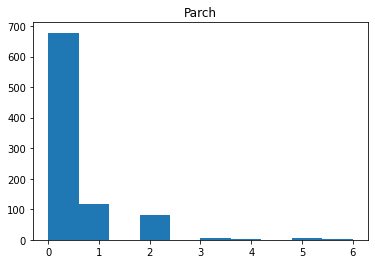

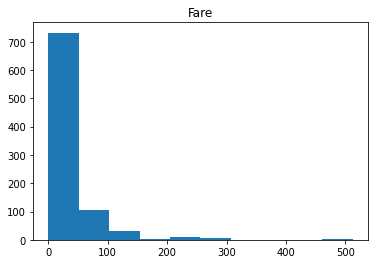

In [7]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

**plot a correlation heatmap between the numeric columns**

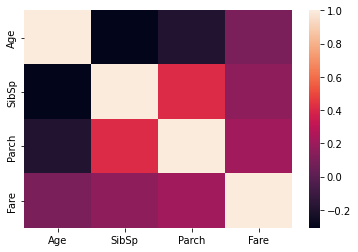

In [8]:
sns.heatmap(df_num.corr())

we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together

**compare survival rates across the numeric variables**

In [9]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


*   The average age of survivors is 28, so young people tend to survive.
*   People who paid higher fare rates were more likely to survive.

*   If you have parents, you had a higher chance of surviving.
*   if you are a child, and have siblings, you have less of a chance of surviving.

**do a similar thing with our categorical variables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


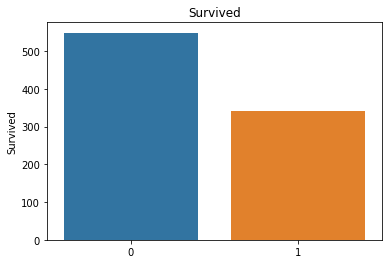

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


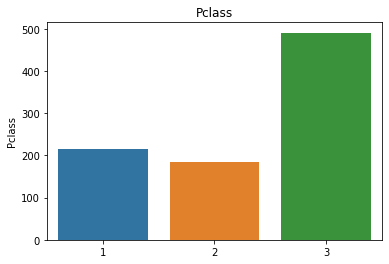

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


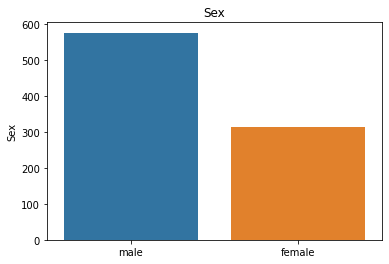

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


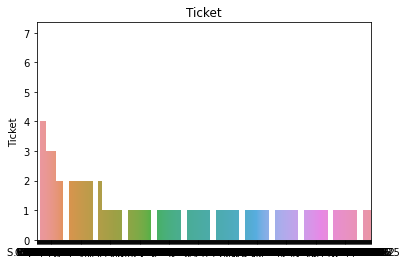

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


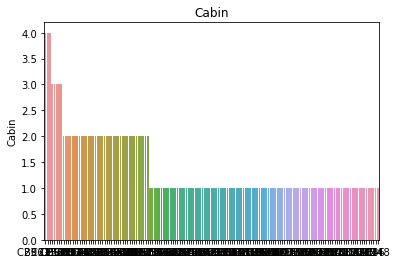

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


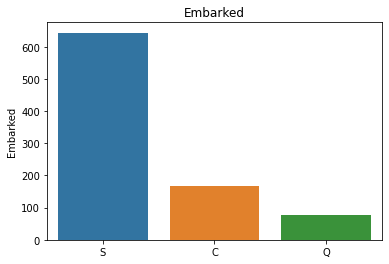

In [10]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

Survived: Most of the people died in the shipwreck, only around 300 people survived.

Pclass: The majority of the people traveling, had tickets to the 3rd class.

Sex: There were more males than females aboard the ship, roughly double the amount.

Embarked: Most of the passengers boarded the ship from Southampton.

**we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:**

In [11]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


1. Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class
2. Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.


3. Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving 

# Checking missing value percentage

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


# **Insights**

# Checking the Correlation between Age, Sex and survival rate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


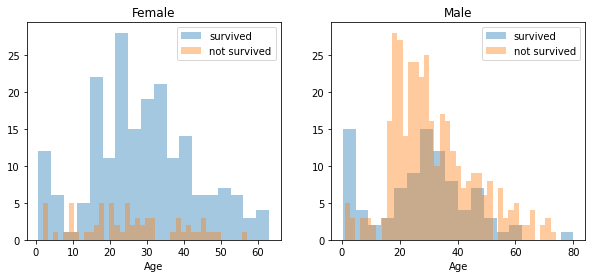

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

# Embarked, Pclass and Sex correlation with survival rate


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


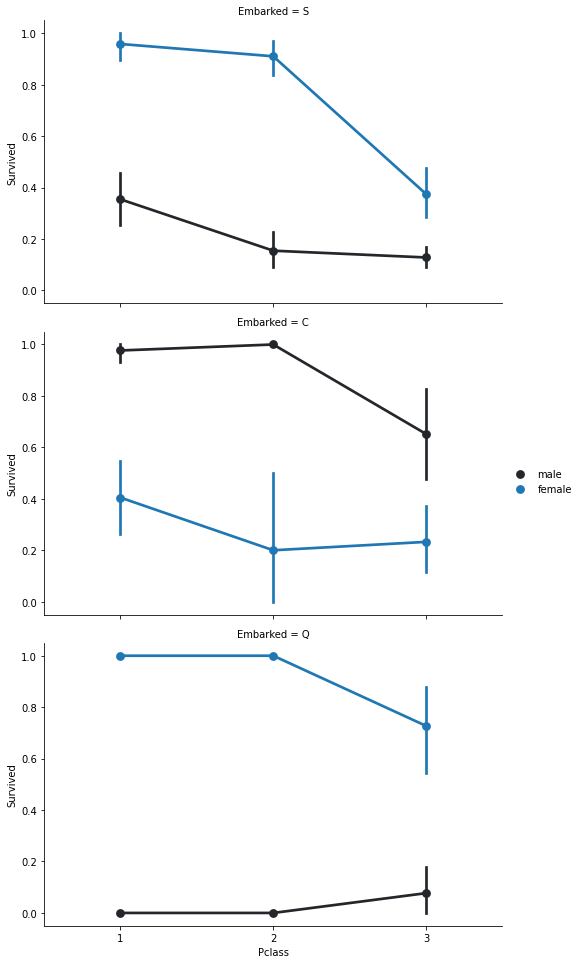

In [14]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

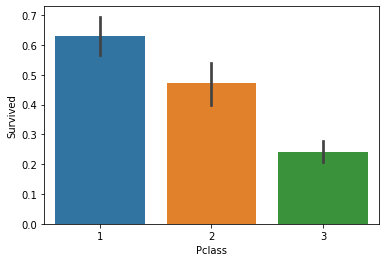

In [15]:
sns.barplot(x='Pclass', y='Survived', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


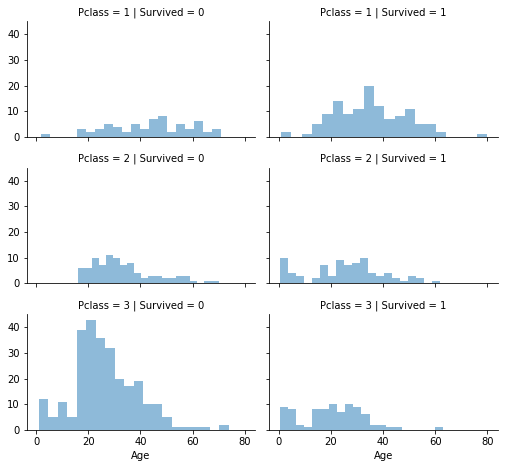

In [16]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Adding SibSp and Parch to get total number of relatives on board and correlating this number to survival rate

**Passengers in Pclass 1 will most likely survive compared to passengers in other classes**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


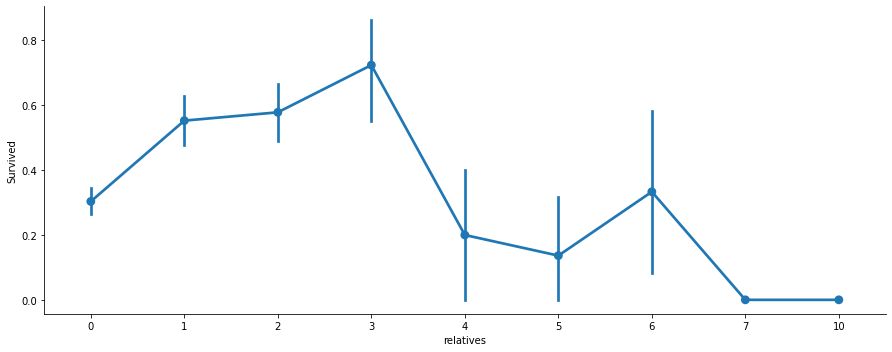

In [17]:
df['relatives']=df['Parch']+df['SibSp']
axes = sns.factorplot('relatives','Survived', 
                      data=df, aspect = 2.5, )

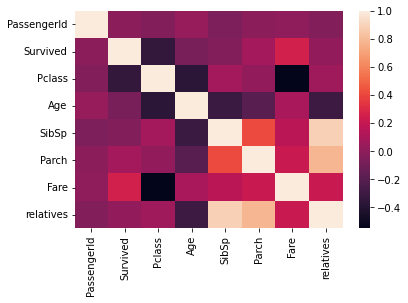

In [18]:
sns.heatmap(df.corr())

# Getting the Deck code of the passanger

In [19]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

df['Cabin'] = df['Cabin'].fillna("U0")
df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df['Deck'] = df['Deck'].map(deck)
df['Deck'] = df['Deck'].fillna(0)
df['Deck'] = df['Deck'].astype(int)

# Cleaning data


In [20]:
df.drop('Name',inplace=True,axis=1)
df.drop('Ticket',inplace=True,axis=1)
df.drop('PassengerId',inplace=True,axis=1)

In [21]:
df = df.drop(['Cabin'], axis=1)

In [22]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [23]:
df["Embarked"].fillna('S',inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   relatives  891 non-null    int64  
 9   Deck       891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [25]:
df['Fare'] = df['Fare'].astype(int)

# Encoding

In [26]:
genders = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(genders)

In [27]:
ports = {"S": 0, "C": 1, "Q": 2}
df['Embarked'] = df['Embarked'].map(ports)

# Grouping Age

In [28]:
df['Age'] = df['Age'].astype(int)
df.loc[ df['Age'] <= 11, 'Age'] = 0
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 2
df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 3
df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 4
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 5
df.loc[(df['Age'] > 40) & (df['Age'] <= 66), 'Age'] = 6
df.loc[ df['Age'] > 66, 'Age'] = 6

df['Age'].value_counts()

4    303
6    148
3    106
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

# Grouping Fare

In [29]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
df.loc[ df['Fare'] > 250, 'Fare'] = 5
df['Fare'] = df['Fare'].astype(int)

In [30]:
df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

# Creating a new feature for Fare per Passenger

We did so because the fare was for the whole family.

In [31]:
df['Fare_Per_Person'] = df['Fare']/(df['relatives']+1)
df['Fare_Per_Person'] = df['Fare_Per_Person'].astype(int)

In [32]:
df.describe()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Deck,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,8,0
1,1,1,1,5,1,0,3,1,1,3,1
2,1,3,1,3,0,0,0,0,0,8,0
3,1,1,1,5,1,0,3,0,1,3,1
4,0,3,0,5,0,0,1,0,0,8,1


# Splitting Data

In [33]:
# Set variables for the targets and features
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.25, random_state=0)

# Oversampling because this data is imbalanced

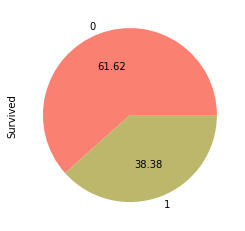

In [34]:
y.value_counts().plot.pie(autopct='%.2f',colors=['salmon','darkkhaki'])

In [35]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_train,Y_train = oversample.fit_resample(X_train, Y_train)

## Building multiple ML Models

In [36]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [37]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

Y_prediction = model.predict(X_test)

model.score(X_train, Y_train)
acc_model = round(model.score(X_train, Y_train) * 100, 2)

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [40]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [41]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [42]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [43]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Getting all models results

In [44]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_model, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.95,Random Forest
91.95,Decision Tree
86.95,KNN
78.17,Logistic Regression
77.80,Support Vector Machines
77.80,Perceptron
77.44,Naive Bayes
72.07,Stochastic Gradient Decent


# Model Validation


In [45]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82926829 0.76829268 0.84146341 0.84146341 0.79268293 0.84146341
 0.85365854 0.91463415 0.82926829 0.87804878]
Mean: 0.8390243902439025
Standard Deviation: 0.038487155702584146


# Checking effictive values
 

In [46]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.312
Age,0.177
Pclass,0.100
Deck,0.097
Fare,0.072
relatives,0.064
Embarked,0.061
Fare_Per_Person,0.046
SibSp,0.042


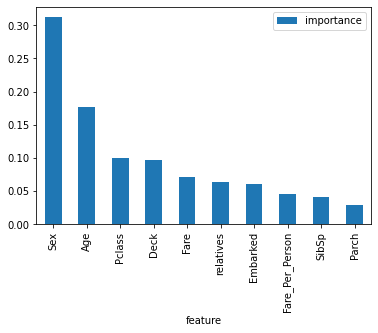

In [47]:
importances.plot.bar()

In [48]:
df.drop('Parch',inplace=True,axis=1)
df.drop('Fare_Per_Person',inplace=True,axis=1)
df.drop('SibSp',inplace=True,axis=1)
#these 3 features are the least effective.

# Further analysis on Random forest classifier

In [49]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, oob_score = True)
model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

model.score(X_train, Y_train)

acc_model = round(model.score(X_train, Y_train) * 100, 2)
print(round(acc_model,2,), "%")

91.95 %


In [50]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [10,20,100]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [10, 20, 100]})

In [51]:
# Random Forest
model = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

model.score(X_train, Y_train)

print("oob score:", round(model.oob_score_, 4)*100, "%") #one out of bag

oob score: 83.05 %


# Evaluating Classification Metrics

In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[355,  55],
       [ 80, 330]])

In [53]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8571428571428571
Recall: 0.8048780487804879


In [54]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions,average=None)

array([0.84023669, 0.83018868])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_prediction ))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       139
           1       0.82      0.75      0.78        84

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



# Plotting preformance curves

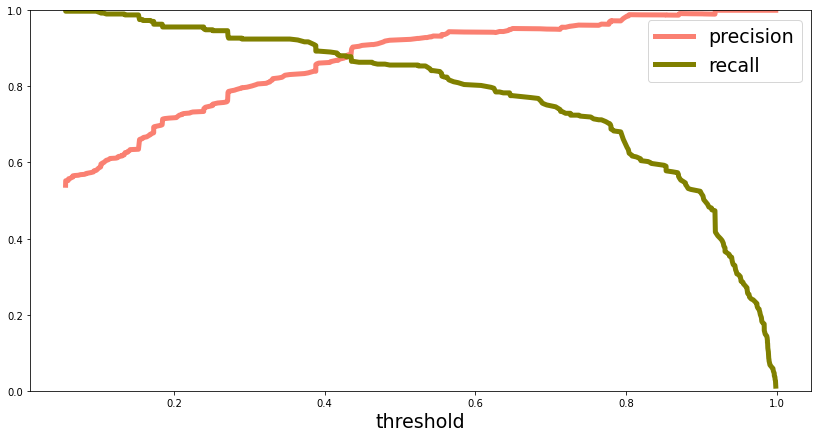

In [56]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = model.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "salmon", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "olive", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

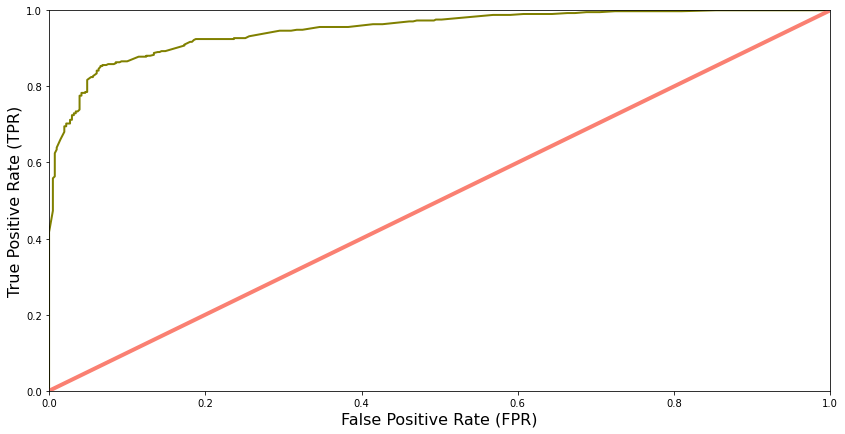

In [57]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label,color='olive')
    plt.plot([0, 1], [0, 1], 'salmon', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9488370017846519


# Implementing Stack Regressor

In [59]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

level1 = LogisticRegression()

model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, Y_train)

model.score(X_train, Y_train)

acc_model = round(model.score(X_train, Y_train) * 100, 2)
print(round(acc_model,2,), "%")

90.37 %
